<a href="https://colab.research.google.com/github/nickdevreker/CV-NLP-pneumonie-prj/blob/main/dd2604_eenvoudig_model_vanuit_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

test

In this project, we will use Convolutional Neural Network to build train and test a pneumonia detection model in chest X-rays. We will build this model using tensorflow and keras. It is a binary classification problem. This model can be used to help docters improve their diagnosis process.

via een command line in de supercomputer: deze github repo clonen



✔ [Apr/29 16:53] vsc35253@tier2-p-login-1 ~ $ cd /data/leuven/352/vsc35253

✘ [Apr/29 17:02] vsc35253@tier2-p-login-1 /data/leuven/352/vsc35253 $ git clone https://github.com/CV-NLP-KULAK/OFFICIAL-PNEUMONIA-REPO.git
Cloning into 'OFFICIAL-PNEUMONIA-REPO'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.

In [ ]:
# Run this cell and select the kaggle.json file downloaded from the Kaggle account settings page.
#eigen kaggle API hier uploaden
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

We will start by connecting to Kaggle using Kaggle API which can be downloaded from your Kaggle account's settings and uploading it here(upload box).

In [ ]:
# Next, install the Kaggle API client.
!pip install -q kaggle

Installing kaggle api using pip

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle, so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

Setting up Kaggle using Kaggle API.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/CV KUL/master

/content/drive/MyDrive/CV KUL/master


In [ ]:
# Creating directory and changing the current working directory
!mkdir X_rays
%cd X_rays

/content/drive/MyDrive/CV KUL/master/X_rays


To store the data we will create a new directory and make it as current working directory.

https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/

In [ ]:
# Searching for dataset
!kaggle datasets list -s rsna-pneumonia-detection-challenge

ref                                                           title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
tawsifurrahman/covid19-radiography-database                   COVID-19 Radiography Database                       778MB  2022-03-19 13:38:42          63963        821  1.0              
preetviradiya/covid19-radiography-dataset                     COVID-19 Radiography Dataset                        747MB  2021-05-22 05:04:10           3866         64  1.0              
tawsifurrahman/tuberculosis-tb-chest-xray-dataset             Tuberculosis (TB) Chest X-ray Database              663MB  2021-06-14 09:58:38           8569        142  0.9375           
andyczhao/covidx-cxr2                                         COVIDx C

Searching Kaggle for the required dataset using search option(-s) with title 'rsna-pneumonia-detection-challenge'. We can also use different search options like searching competitions, notebooks, kernels, datasets, etc.

In [ ]:
# Downloading dataset and coming out of directory
!kaggle datasets download blank3030/rsnapneumoniadetectionchallenge
%cd ..

100% 3.66G/3.66G [00:44<00:00, 67.2MB/s]
100% 3.66G/3.66G [00:44<00:00, 89.0MB/s]
/content/drive/MyDrive/CV KUL/master


After searching the data next step would be downloading the data into collab notebook using references found in search option.

In [ ]:
%cd /content/drive/MyDrive/CV KUL/master/X_rays #aanpassen aan dir vd superpc

In [ ]:
# Unzipping downloaded file and removing unusable file
!unzip rsnapneumoniadetectionchallenge.zip -d X_rays


Streaminguitvoer ingekort tot de laatste 5000 regels.
  inflating: X_rays/stage_2_train_images/d5252a78-3ea1-48e9-9ffb-e7535be3ce80.dcm  
  inflating: X_rays/stage_2_train_images/d525eafb-8908-45fd-a942-48d07c435487.dcm  
  inflating: X_rays/stage_2_train_images/d5265640-17db-4880-866d-d2952e32941c.dcm  
  inflating: X_rays/stage_2_train_images/d5277276-f8f8-40e9-b8e1-791cf5d96ac0.dcm  
  inflating: X_rays/stage_2_train_images/d528d9e9-647a-4e2e-a16c-bd5e32a5bbf5.dcm  
  inflating: X_rays/stage_2_train_images/d5293a3e-f050-4b98-8bbf-1f40e25bced5.dcm  
  inflating: X_rays/stage_2_train_images/d52cbb5a-1d0a-457d-8c72-0f7aeec21ca7.dcm  
  inflating: X_rays/stage_2_train_images/d52ce67b-be7c-4349-8dc4-38562928d208.dcm  
  inflating: X_rays/stage_2_train_images/d535a3c8-c4a4-4856-b5cd-17f6332eac8b.dcm  
  inflating: X_rays/stage_2_train_images/d5360dc4-6bea-4a7b-bc49-5b2547ad7877.dcm  
  inflating: X_rays/stage_2_train_images/d5364bc1-bc2a-4bd0-a1bd-0cfb5a369ccc.dcm  
  inflating: X_rays/st

We will unzip the data which is downloaded.

In [ ]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

Importing required libraries.

In [ ]:
!pip install pydicom
import pydicom
import cv2
from tqdm.notebook import tqdm
from pathlib import Path

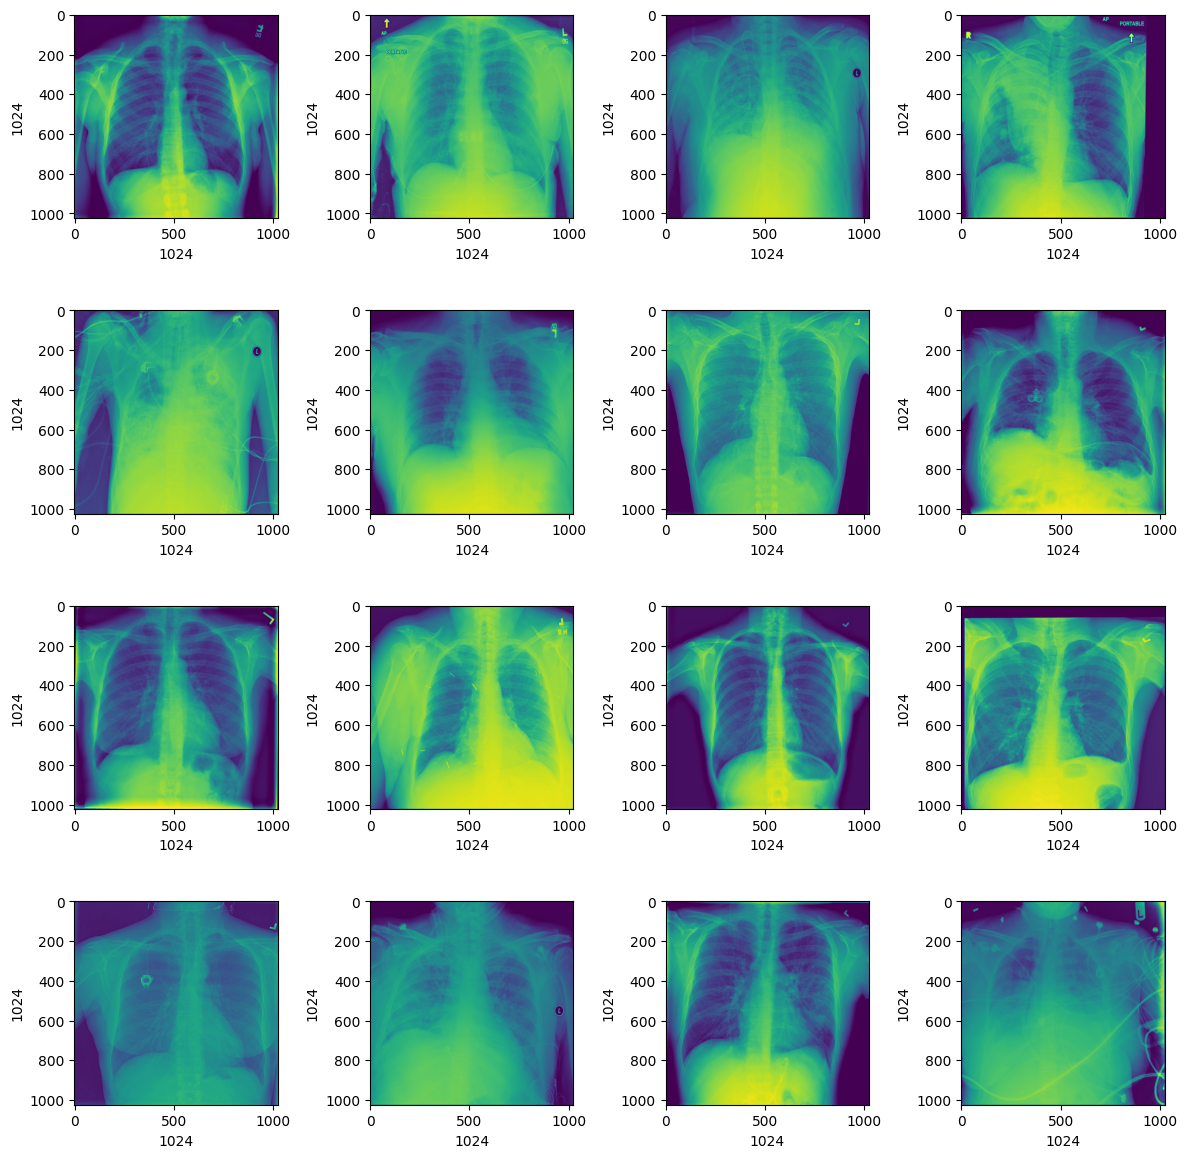

In [ ]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/CV KUL/master/X_rays/X_rays/stage_2_test_images"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = pydicom.read_file(path +'/'+ random.choice(sorted(os.listdir(path)))).pixel_array
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [ ]:
print(rand_img.shape)

(1024, 1024)


In [ ]:
labels = pd.read_csv("/content/drive/MyDrive/CV KUL/master/X_rays/X_rays/stage_2_train_images/stage_2_train_labels.csv")
labels.head(6)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1


In [ ]:
# Remove duplicate entries
labels = labels.drop_duplicates("patientId")
labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [ ]:
ROOT_PATH = Path("/content/drive/MyDrive/CV KUL/master/X_rays/X_rays/stage_2_train_images")


Visualizing some coloured random images  from the test dataset. we can see here 

---

that the dimension of images are igual.

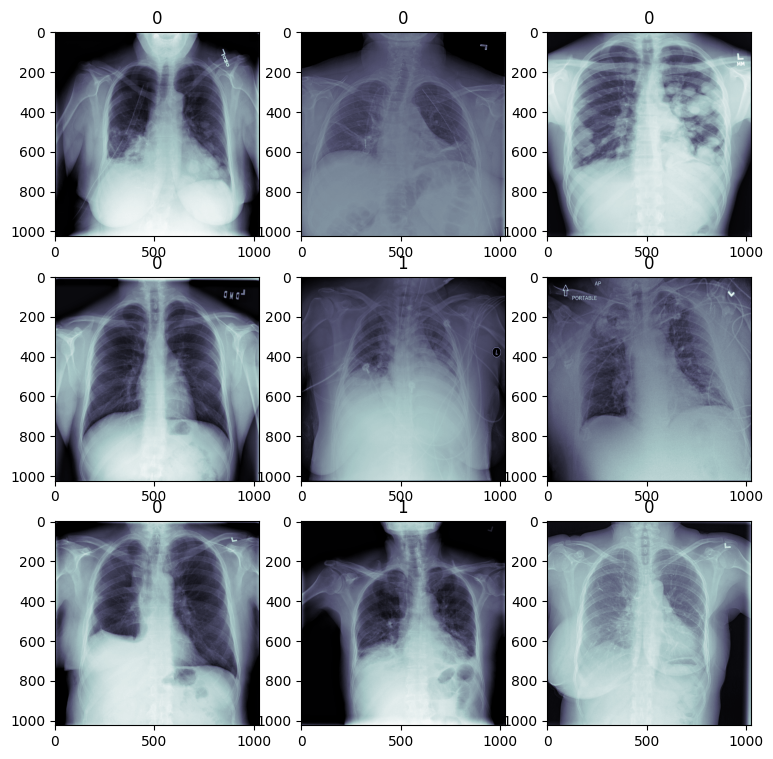

In [ ]:
fig, axis = plt.subplots(3, 3, figsize=(9, 9))
c = 0
for i in range(3):
    for j in range(3):
        patient_id = labels.patientId.iloc[c]
        dcm_path = ROOT_PATH/patient_id
        dcm_path = dcm_path.with_suffix(".dcm")
        dcm = pydicom.read_file(dcm_path).pixel_array
        
        label = labels["Target"].iloc[c]
        
        axis[i][j].imshow(dcm, cmap="bone")
        axis[i][j].set_title(label)
        c+=1




In [ ]:
num_files = len(os.listdir(ROOT_PATH))
print(num_files)

18556


In [ ]:
# dataloader

nr_train_images = 1000  # Om het aantal afbeelding in de training set te beperken. Verhoog indien jouw systeem het toelaat.
train_images = []
train_labels = []


c=0
for f in os.listdir(ROOT_PATH)[:nr_train_images]:#zo pc power kan nr_train_images vervangen worden tot  num_files max

   patient_id = labels.patientId.iloc[c]
   dcm_path = ROOT_PATH/patient_id
   dcm_path = dcm_path.with_suffix(".dcm")
   dcm = pydicom.read_file(dcm_path).pixel_array / 255  
     # Resize the image as 1024x1024 is way to large to be handeled by Deep Learning models at the moment
    # Let's use a shape of 224x224
    # In order to use less space when storing the image we convert it to float16
   dcm_array = cv2.resize(dcm, (224, 224)).astype(np.float16)
 
   label = labels.Target.iloc[c]
   train_images.append(dcm_array)
   train_labels.append(label)
   c +=1

In [ ]:
#array van lists maken
X_train = np.array(train_images)
y_train = np.array(train_labels)

In [ ]:
X_train.shape


(1000, 224, 224)

In [ ]:

y_train

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,

In [ ]:
X_train = X_train.reshape((len(X_train), 224, 224,1))

idx = np.random.permutation(len(X_train))
X_train, y_train = X_train[idx], y_train[idx]
X_train = X_train.astype('float32')



In [ ]:
X_train.shape

(1000, 224, 224, 1)

Now we will convert all the images into numpy array and normalize them.

Storing the label ids into numpy array and printing the shape. Here we can observe that their are 39209 label ids.

Now we will observe images per class for checking whether the data is balanced or not. From the result we can say that data is balanced.

In [ ]:
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X_train, y_train , test_size = 0.2, random_state = 42)

The next step would be to split the data into training and validation with 80% of training data and 20% of validation data.

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'softmax'))

Defining the model architecture. In this we will define all the layers with their input shape kernel size, activation, etc.

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 64)      640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 112, 112, 64)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 110, 110, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 55, 55, 64)       

Compiling the model using metrics, optimizer and loss as required and printing out the summary of the model.

In [ ]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


7/7 - 161s - loss: 0.0000e+00 - accuracy: 0.3288 - val_loss: 0.0000e+00 - val_accuracy: 0.2950 - 161s/epoch - 23s/step
Epoch 2/10
7/7 - 168s - loss: 0.0000e+00 - accuracy: 0.3288 - val_loss: 0.0000e+00 - val_accuracy: 0.2950 - 168s/epoch - 24s/step
Epoch 3/10
7/7 - 156s - loss: 0.0000e+00 - accuracy: 0.3288 - val_loss: 0.0000e+00 - val_accuracy: 0.2950 - 156s/epoch - 22s/step
Epoch 4/10
7/7 - 156s - loss: 0.0000e+00 - accuracy: 0.3288 - val_loss: 0.0000e+00 - val_accuracy: 0.2950 - 156s/epoch - 22s/step
Epoch 5/10
7/7 - 156s - loss: 0.0000e+00 - accuracy: 0.3288 - val_loss: 0.0000e+00 - val_accuracy: 0.2950 - 156s/epoch - 22s/step
Epoch 6/10
7/7 - 171s - loss: 0.0000e+00 - accuracy: 0.3288 - val_loss: 0.0000e+00 - val_accuracy: 0.2950 - 171s/epoch - 24s/step
Epoch 7/10
7/7 - 158s - loss: 0.0000e+00 - accuracy: 0.3288 - val_loss: 0.0000e+00 - val_accuracy: 0.2950 - 158s/epoch - 23s/step
Epoch 8/10
7/7 - 154s - loss: 0.0000e+00 - accuracy: 0.3288 - val_loss: 0.0000e+00 - val_accuracy: 0.

Now we will fit the model and observe how our is getting trained on each epoch.

<Axes: >

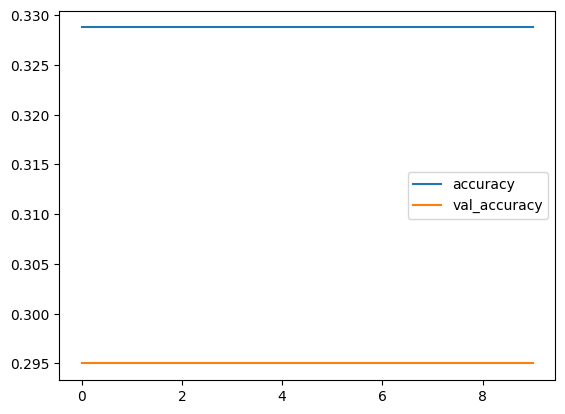

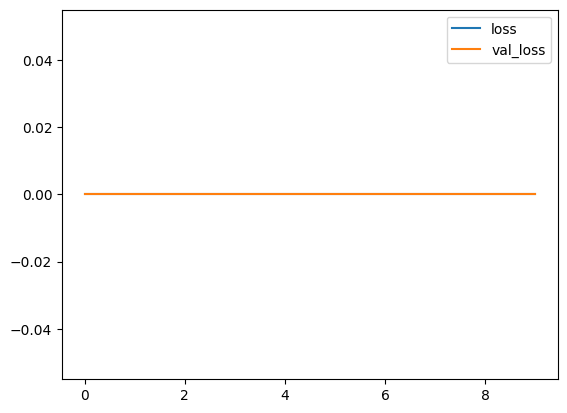

In [ ]:

evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

Next we will visualize the accuracy and loss per epoch. For this we will store the model history in the pandas dataframe and plot them.

In [ ]:
y_pred = model.predict_classes(test_images);
y_pred

AttributeError: ignored

Let's visualize test image

Finding out original label for the image above.

In [ ]:
# Predicted label
print("Predicted label : ",all_lables[y_pred[1]])

NameError: ignored

Finding out the predicted label for the image above.

## transferlearning: Hertrain het VGG19 netwerk (of optioneel ResNet) op de deze dataset. Vergelijk de resultaten met deze van het eigen CNN in termen van accuraatheid, f1-score, snelheid van training, de benodigde hoeveelheid training data, etc.

In [ ]:
import pydicom
from PIL import Image




nr_train_images = 1000  # Om het aantal afbeelding in de training set te beperken. Verhoog indien jouw systeem het toelaat.
train_images = []
train_labels = []


c=0
for f in os.listdir(ROOT_PATH)[:nr_train_images]:#zo pc power kan nr_train_images vervangen worden door num_files

   patient_id = labels.patientId.iloc[c]
   dcm_path = ROOT_PATH/patient_id
   dcm_path = dcm_path.with_suffix(".dcm")
   ds = pydicom.dcmread(dcm_path)
   pil_image = Image.fromarray(ds.pixel_array)
   pil_image.save('/content/drive/MyDrive/CV KUL/master/X_rays/X_rays/dcm_path.jpeg')
 
   label = labels.Target.iloc[c]
   train_images.append(pil_image)
   train_labels.append(label)
   c +=1



In [ ]:
import cv2
import numpy as np

# Load the grayscale images
gray_images = np.load('path/to/gray_images.npy')

# Create an empty array to store the RGB images
rgb_images = np.empty((gray_images.shape[0], 224, 224, 3))

# Iterate over the grayscale images
for i in range(gray_images.shape[0]):
    # Convert the grayscale image to RGB
    rgb_image = cv2.cvtColor(gray_images[i], cv2.COLOR_GRAY2RGB)
    # Store the RGB image in the output array
    rgb_images[i] = rgb_image

# Normalize the RGB images (if needed)
rgb_images = rgb_images / 255.0

# Convert to Keras model
model = Sequential()
for layer in modelVGG19.layers[:]:
    model.add(layer)

input_layer = Input(shape=(224, 224, 3))
output_layer = model(input_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

In [ ]:
x_train.shape

(800, 224, 224, 1)

The VGG19 model is trained on RGB images, which have three color channels (Red, Green, and Blue). The input_shape argument that you pass to the model should have three dimensions: the width, the height, and the number of channels. In your case, the input_shape seems to be (224, 224, 1), which means that the images have only one channel.

To resolve this issue, you need to ensure that the input images have three color channels instead of one. You can use the tf.keras.layers.Lambda layer to expand the dimensions of the input images. 

In [ ]:
from tensorflow.keras.layers import Lambda

In [ ]:
# expand the dimensions of the input images from (224, 224, 1) to (224, 224, 3)
x_train = Lambda(lambda x: tf.image.grayscale_to_rgb(x))(x_train)
x_test = Lambda(lambda x: tf.image.grayscale_to_rgb(x))(x_test)

In [ ]:
x_train.shape

TensorShape([800, 224, 224, 3])

In [ ]:
# Uitwerking transfer learning
modelVGG19 = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', input_shape=x_train.shape[1:])
type(modelVGG19)

keras.engine.functional.Functional

In [ ]:
modelVGG19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras.layers import Input
from keras.models import Model


In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Convert to Keras model

model = Sequential()

for layer in modelVGG19.layers[:]:
    model.add(layer)



# Print the modified model summary
model.summary()




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
# set coefficients to fixed

for layer in model.layers:
    layer.trainable = False

# Add custom dense layers


model.add(Flatten()) 
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='softmax'))

In [ ]:
adam = tf.keras.optimizers.Adam()
model.compile(loss='binary_crossentropy',optimizer =adam,metrics=['accuracy'])
#model.summary()

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions

In [ ]:
X_train = preprocess_input(x_train)

In [ ]:
# Train VGG model
batch_size =256
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size,  validation_split =0.2, epochs=epochs, verbose=1)

Epoch 1/10
3/3 [==============================] - 707s 234s/step - loss: 0.6604 - accuracy: 0.3063 - val_loss: 0.6592 - val_accuracy: 0.3187
Epoch 2/10
3/3 [==============================] - 685s 234s/step - loss: 0.6550 - accuracy: 0.3063 - val_loss: 0.6544 - val_accuracy: 0.3187
Epoch 3/10
3/3 [==============================] - 687s 235s/step - loss: 0.6498 - accuracy: 0.3063 - val_loss: 0.6500 - val_accuracy: 0.3187
Epoch 4/10
3/3 [==============================] - 684s 234s/step - loss: 0.6450 - accuracy: 0.3063 - val_loss: 0.6461 - val_accuracy: 0.3187
Epoch 5/10
3/3 [==============================] - 685s 233s/step - loss: 0.6408 - accuracy: 0.3063 - val_loss: 0.6425 - val_accuracy: 0.3187
Epoch 6/10
3/3 [==============================] - 679s 231s/step - loss: 0.6368 - accuracy: 0.3063 - val_loss: 0.6394 - val_accuracy: 0.3187
Epoch 7/10
3/3 [==============================] - 683s 233s/step - loss: 0.6333 - accuracy: 0.3063 - val_loss: 0.6367 - val_accuracy: 0.3187
Epoch 8/10
3/

In [ ]:
# Plot of the training history

# Accuray 
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Testing with the test set

y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=-1)
print('\n')
print(classification_report(y_test, y_pred))


cf = confusion_matrix(y_test, y_pred)

print(cf)
print(accuracy_score(y_test, y_pred) * 100) 